# Justin's Notes on HR Diagram Notebook

## Motivation
---
There is some evidence of the connections between main sequence stars and protoplanetary disks, but they are not definitive/tested/proven for young stars. Evidence/theories are based on the star's mass (stellar mass). Difficult to measure properties of young stars (many complicated factors- uncertain reference sources, extinction, initial conditions, accretion, winds, strong magnetic activity).

**Protoplanetary disk**- rotating gas and dust around a young star (will eventually form stable main sequence star) 

**Main sequence star** - (stable) stars on the HR diagram  

## Models
---
### MIST

MIST stands for **MESA Isochrones & Stellar Tracks**
* uses stellar evolution code MESA to isolate mass tracks from 0.1 M$\odot$ to 50 M$\odot$
* designed by Harvard grad student, modified a bit more by Harvard
* contains different models of mass tracks and isochromes
    * **mass track** - gives values for luminosity, age, temperature, radius at fixed values of stellar mass
    * **isochrome** - "equal time" gives values for luminosity, age, temperature, radius at fixed values of age
    * __evolutionary track__: both of them together (shows how mass and age change as a function of temp and lum) 

**MESA**- Modules for Experiments in Stellar Astrophysics
* written by Bill Paxton (Adobe)
* Uses stellar evolution simulations to predict

Some variables might be given in a linear format, and some are in log format... guess and check to find out!

has hard temperature boundaries, unlike other models


#### Problems with MIST/current models
1. Cannot get precise measurements of temperature/luminosity because of systematic uncertainties
2. Models of stars also have inaccuracies

**Which of these two problems matter? How inaccurate are they?**


### F16 Models
Originated in 2016 from [Feiden](https://ui.adsabs.harvard.edu/abs/2016A%26A...593A..99F/abstract)

At its core, the F16 models are magnetic stellar evolution isochrones

Have a fixed magnetic field strength that is probably overestimated

#### Background:
magnetic fields slow down convection in the convective zone

magnetic fields are caused by movement of gases and the sun's rotation
sunspots produce magnetic fields



## HR Diagram
---
HR Diagram tracks bolumetric luminosity vs. effective temperature of a star  

**Bolumetric Luminosity** - luminosity across all wavelengths of light [erg/s]  
> $L_\ast$ is defined as the rate of energy emitted by the star, integrated over all frequencies (or wavelengths) of light.

$L_\ast = 4 \, \pi \, \sigma_{\rm SB} \, R_\ast^2 \, T_{\rm eff}^4$

Where $\sigma_{\rm SB}$ = Stefan-Boltzmann constant and $R_\ast$ = stellar radius. Usually in units of the Sun's luminosity, $L_\odot = 3.828 \times 10^{33}$ erg s$^{-1}$.

### HR Code for Sun (generates figure)

Text(0, 0.5, '$\\log{L_\\ast} \\,\\, [{\\rm L}_\\odot]$')

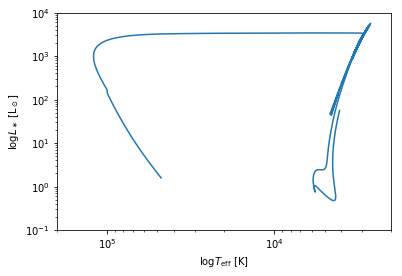

In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
%matplotlib inline

working_dir = '/Users/justinvega/Documents/GitHub/dyn-masses/notebooks/preMS_models/'
if not os.path.isdir(working_dir):
    os.mkdir(working_dir)
filename_iso = 'MIST_v1.2_vvcrit0.4_full_isos'
filename_eep = 'MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS'

# load the model track
file_track_solar = working_dir+'MIST/'+filename_eep+'/00100M.track.eep'
track_solar = ascii.read(file_track_solar)

# extract the age (in years), log10(luminosity) (in Lsun), and log10(effective temperature) (in K)
age, logL, logTe = track_solar['col1'], track_solar['col7'], track_solar['col12']

# plot the model HRD
Tlim = [200000, 2000]    # note: Teff is plotted backwards (see note below)
Llim = [0.1, 10000]
fig, ax = plt.subplots()
ax.plot(10**logTe, 10**logL)
ax.set_xlim(Tlim)
ax.set_ylim(Llim)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\log{T_{\rm eff}} \,\, [{\rm K}]$')
ax.set_ylabel(r'$\log{L_\ast} \,\, [{\rm L}_\odot]$')

$T_{\text{eff}}$ axis is backwards because the temperature scale is replaced by a ratio that determines color ("a ratio between the emission strengths in two wavelength bands") which increases from 0.0 to 2.0.
> "Low" color values correspond to bluer colors, higher to redder colors. But blue corresponds to hotter temperatures, and vice versa...so you can see where the flip in the  $𝑇_{\text{eff}}$  axis arises.

### Curve Features/Stellar Evolution:
The star's lifespan begins at the start of the curve on right and ends with the end of the curve on left

**Beginning of curve:**  
When a star is born, it is convective and the stellar envelope is inflated. The envelope then contracts and follows roughly vertical relationship called the **Hayashi track**.

**J-shaped hook** (~50 Myr (megayears)):
> "energy dissipation in the outer envelope of the star becomes dominated by radiation (rather than convection)"

**Wiggle at the end of J** (~100 Myr):  
Beginning of Main Sequence (roughly $T_{\rm eff} = 5800$ K, $L_\ast = 1$ L$_\odot$) - Current parameters of Sun  

The Sun is our best reference point for a main sequence star

> Most of the star's life stays fixed right there...the main-sequence phase lasts from about 100 Myr to about 9 Gyr (gigayear). At that point, most of the hydrogen in the star's core is spent from nuclear fusion into helium.

...  

**Giant Branches**:  
After all hydrogen is fused and helium begins to fuse, there is an energy buildup in the core that causes $L_\ast$ to change dramatically (the star expands, causing **red giant branch**)
> It is relatively short-lived, and involves an oscillation in $L_\ast$ (called the **asymptotic giant branch**) as different fusion products are generated in the core.

**Horizontal Branch** ($T_{\rm eff}$ increases at fixed $L_\ast$):   
The stellar core fuses more massive atoms and the star loses most of its structure– becomes gaseous planetary nebula. Gas expands and core of star (central star) contracts.

**End of Curve:**
Central star loses heat and cannot form bonds (ionize) the gas cloud, becoming a **white dwarf**. Gas expands so much that it joins the interstellar medium (matter and radiation that exists in the space between the star systems in a galaxy).


### Quick aside on the regions of a star

[Diagram of layers of the Sun](https://en.wikipedia.org/wiki/Stellar_core)  
There are three large components of a star: the stellar core, stellar envelope, and stellar atmosphere.

**Stellar core**: extremely hot and dense region where thermonuclear fission occurs  
**Stellar envelope**: region that includes radiative zone and convective zones  
**Stellar atmosphere**: outermost region, includes photosphere (visible portion of star) and chromosphere (red layer above photosphere)

Convection currents in convection zone due to plasma rising and falling (like hot air rising)

### Spectra Basics
Luminosity $L_{\odot}$ and temperature $T_{\text{eff}}$ cannot be directly observed
* Temperature of the stellar atmosphere controls amount of atomic/ionic/molecular species there
    * Provides the energy levels (quantum) for atoms/molecules to absorb radiation coming through the atmosphere
* $T_{\text{eff}}$ is usually inferred through an absorption spectra (visible and near-infrared)
    * Spectral Typing
    * Line indices
    * Forward modelling
    * Machine Learning
        
#### Spectral Typing (main method)
Comparing spectra to a template star with a known spectral type

Spectral type: a way of classifying stars (letter_number_romannumeral format)

[Stellar Classification Chart](https://en.wikipedia.org/wiki/Stellar_classification)

#### Morgan-Keenan (MK) system
* Letters {O, B, A, F, G, K, M, L, T, Y} denote the $T_{\text{eff}}$ of stars from hottest to coolest  
* Numbers {0-9} further subdivide by temperature  
* Roman Numerals {0-VII} refer to _luminosity class_ (not absolute size!)
   * **Technically**: "absorption line features that are sensitive to the *surface gravity*, $\log{g}$, where $g = G M_\ast / R_\ast^2$; larger values mean higher $\log{g}$." (The higher the numeral, the wider the lines)
   * **Colloquially** known as hypergiants, supergiants, bright giants, ordinary giants, subgiants, ordinary main sequence stars "dwarfs", subdwarfs, white dwarfs (respectively 0-VII)

**Example:**
> For example, the Sun is a G2V star: G stars have $T_{\rm eff} \approx 5000$-6000 K, the 2 puts $T_{\rm eff}$ toward the higher end of that range ($\sim$5700-5800 K), and the V refers to a main-sequence surface gravity. 

Pre-MS phase, main sequence, and giant branch phase are very similar in $T_\text{eff}$; correspond to class IV, V, and III luminosities, respectively
* Hard to classify young stars since there is no reference star in class IV 

### Working with MIST
Uncertainty of spectral type is usually to the order of $\pm$1 sub-type, but this is an **observable**, not a measurable

Different stellar models have different quirks... which one is 'right'?

### A refresher on interpolation

Interpolation tries to 'guess' values of x and y based on a pre-existing line/curve

Usually linear, polynomial, or spline ([see here for examples](https://en.wikipedia.org/wiki/Interpolation))

~~Use `scipy.interpolate.interp1d` method~~ (Discovered a faster way Week 2)  
Use `scipy.interpolate.griddata` method
* `griddata` takes points (coordinates) and values (known values of what you want to interpolate)

__Syntax:__
`griddata(points, values, interps, method='linear')`

### A refresher on probability and distributions

#### Probability
When we have a value with uncertainties (e.g $T_{\rm eff}=4376 \pm 150 K$), the intended meaning is that Teff has a Gaussian (normal) pdf with mean ($\mu$) = 4376 and standard deviation ($\sigma$) = 150. 

* __Percentiles:__
    * 1$\sigma$ = 16-84th percentile (i.e 68% of the data)
    * 2$\sigma$ = 2-97th percentile (i.e 95% of the data)
    
[For more info on basic statistics](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)

#### Distributions
`np.random.normal(mean, sigma)` generates a normal distribution of values for a given mean and SD

__Need to figure out uncertainties of the models:__ they are intrinsic to each model, not a result of observation

So we infer an uncertainty for a measurement, generate a new distribution of values within the uncertanties to feed into the interpolation, and infer the new sigmas

__In more systematic terms:__

Measurement with Uncertainties -> generate distribution of values within the uncertainties (which are our new interpolation points) -> feed into the interpolation -> generates distributions of values -> find out what the distribution looks like to infer sigmas

## Project Timeline
---
* **Week 1:** Learning about HR Diagram
   * Goal: familiarize with astropy/mass tracks/isochrones
   * _Frustration with not knowing how to code correctly_
* **Week 2:** Addendum of HR Diagram about interpolation, double-tracking problem  
   * Goal: figure out how to segment the interpolation of luminosity and temperature to get mass and age  
* **Week 3:** Playing around with griddata and arrays
   * Goal: use `scipy.interpolate.griddata` to make a gridded HR diagram/image plot based on teff, lum, and mass/age
* **Week 4:** Playing around with imshow and plots, new F16 model
   * Goal: Make a HR diagram image plot, colormap and normalize it, and align the mass tracks and isochrones to it.
       * Completed: (7/28) MIST colormaps are verified by mass tracks and isochrones  
   * Goal: Do the same grid/plotting with new F16 model
       * Completed: (7/30) F16 colormaps are verified only by mass tracks (working on isochrones)
* **Week 5:** Probability Distribution Functions and SPOTS
   * Goal: Make code that computes PDFs for MIST
   * Goal: Make code that computes PDFs for SPOTS
   * Goal: Compare PDFs of MIST and SPOTS
       * Completed: (8/4) Made SPOTS Model mass/age plots, and rendered PDF for SPOTS

#### 8/3/20 Notes

Mass and ages are intrinsically imprecise, they have intrinsic uncertanties that are independent from models:
* Calculating stellar mass will give you an uncertainty within 20-30% of the value (e.g 1 $M_{\odot} \pm 0.2 M_{\odot}$)
* Calculating a stellar age will give you an uncertainty 5-10x (e.g 1 Myr ± 5 Myr)

Magnetic fields serve one portion of the uncertainty–serve as better indicator for lower mass stars (1.3 - 1.4 $M_{\odot}$)

This is the threshold for when stars are dominated by radiative processes (as opposed to convection)

Incorporate magnetic models into account will sway MIST distributions, and will better correct them

discoveries in star formation informs those interested in galactic formation/stellar populations


theory that stars in a cluster are scattered around a particular isochrone (different ages): are they really different ages? or is it observational uncertainty? or model uncertainty?

magnetic fields arise in lower mass stars because rotating ionized fluid (basic components of star) will cause a magnetic field

In planet formation, assume that cluster was born at roughly the same time
End goal:

In stellar population/demographic studies, uncertain if clusters were actually born at the same time
Case study: Upper Scorpius (~1Myr)


How to resolve differences between mag model and MIST?
Use an independent mass calculation (protoplanetary disks) and figure out how much magnetic field you need to predict the right age

Finding out the right age is wildly important, because then you have more time to account for when it comes to planet formation (planetary disks have more time to make a planet, elements have longer time to decay, etc.)

